Let's start simple. How to do you code a mathematical function in python? 

In [1]:
import numpy as np

def f(x):
    return x + 5

f(10)

15

But do we really want to go back and edit f(x) every time we want to do something different? We can fix this with python's `eval` function. Using `eval` is generally a no-no and introduces security risks, but it's fine for the purposes of this notebook. It will allow us to express the function as a string.

In [2]:
function = 'x + 5'

def f(x, function=function):
    return eval(function)

f(5)

10

In [3]:
f(10, '2*x + 2')

22

# Graphing

Populating the interactive namespace from numpy and matplotlib


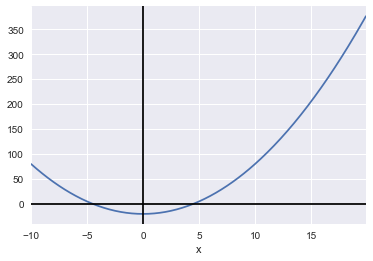

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
function = 'x + 5'
def graph(function=function, xlim=(-10,20), ylim=(-10,10)):
    sr = pd.DataFrame()

    sr['x'] = np.arange(xlim[0],xlim[1],.1)
    sr['y'] = eval(function.replace('x', "sr['x']"))
    sr = sr.set_index('x')

    sr.y.plot()

    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    #return sr

graph('x**2 - 20')

In [30]:
def limit(x, function=function):
    lower_limit = f(x - .0000001, function=function)
    upper_limit = f(x + .0000001, function=function)
    if np.abs(upper_limit - lower_limit) > 100000:
        print('No limit exists')
        return None
    else:
        L = (lower_limit + upper_limit)/2
        return round(L, 4)

Let's unpack what this function is doing. It gets arbitarily close to f(x) from both above and below, and then takes the average of f(x) at those two values. If there's a massive difference between the upper and lower limits, then no limit exists and it returns `None`.

In [31]:
limit(9)

14.0

In [32]:
limit(0, '1/x')

No limit exists


You can do just about anything you need to with this function. For example, what's the limit of $f(x) = 1/x$ as $x$ approaches infinity?

In [33]:
limit(np.inf, '1/x')
# Exactly what you'd expect...

0.0

In [34]:
limit(np.inf, 'x')

inf

We can calculate the derivative in a similar way: get arbitrarily close to x and then calculate the slope between that point and x.

In [51]:
def derivative(x, function=function):
    h = 1/1e10
    rise = f(x+h, function=function) - f(x, function=function)
    run = h
    return round(rise/run,4)

In [54]:
x = 4

derivative(x, '3*x**3 + x**2')

151.9999

In [55]:
# We get the same answer calculating it manually.
9*x**2 + 8

152

In [67]:
def integral(xstart, xfinish, function=function, rectangles=100000):
    width = (xfinish - xstart)/rectangles
    running_sum = 0
    for i in range(int(rectangles)):
        try:
            height = f(xstart + i*width, function=function)
            # each rectangle is 1 width after the previous one
            area = height * width
            running_sum += area
        except:
            continue
    return round(running_sum,4)

In [68]:
integral(0,4, 'x**2')

21.333

Simple example to show it's working: calculate the area of a rectangle

In [71]:
# f(x) = 5
integral(0,10, '5')

50.0

It's probably easier to do this in scipy. Here's how.

In [73]:
import scipy.integrate as integrate

# Returns a tuple: (result, upper bound on the error)
result, upper_bound = integrate.quad(lambda x: 5, 0, 10)

result

50.0

In [79]:
# Getting fancy!
result, upper_bound = integrate.quad(lambda x: (4*x**3 + 2*x**2)/(5*x), 0, 8)

result

149.33333333333334